<a href="https://colab.research.google.com/github/Yash0082/IGurus/blob/main/Task7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Yash Adagale**

In [ ]:
# Load libraries
import pandas as pd
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [ ]:
from google.colab import files
upload = files.upload()

Saving diabetes.csv to diabetes (2).csv


In [ ]:
data = pd.read_csv("diabetes.csv")

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.shape

(768, 9)

Feature Selection

In [ ]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
x = data[feature_cols] # Features
y = data.Outcome # Target variable


Splitting Data


In [ ]:
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
# 70% training and 30% test


Building Decision Tree Model

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf = clf.fit(x_train,y_train)

In [ ]:
# y_pred = clf.predict(x_test)
print(x_test.dtypes)


Pregnancies                   int64
Insulin                       int64
BMI                         float64
Age                           int64
Glucose                       int64
BloodPressure                 int64
DiabetesPedigreeFunction    float64
dtype: object


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [ ]:
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100))

Accuracy: 66.66666666666666


In [ ]:
!pip install graphviz
!pip install pydotplus

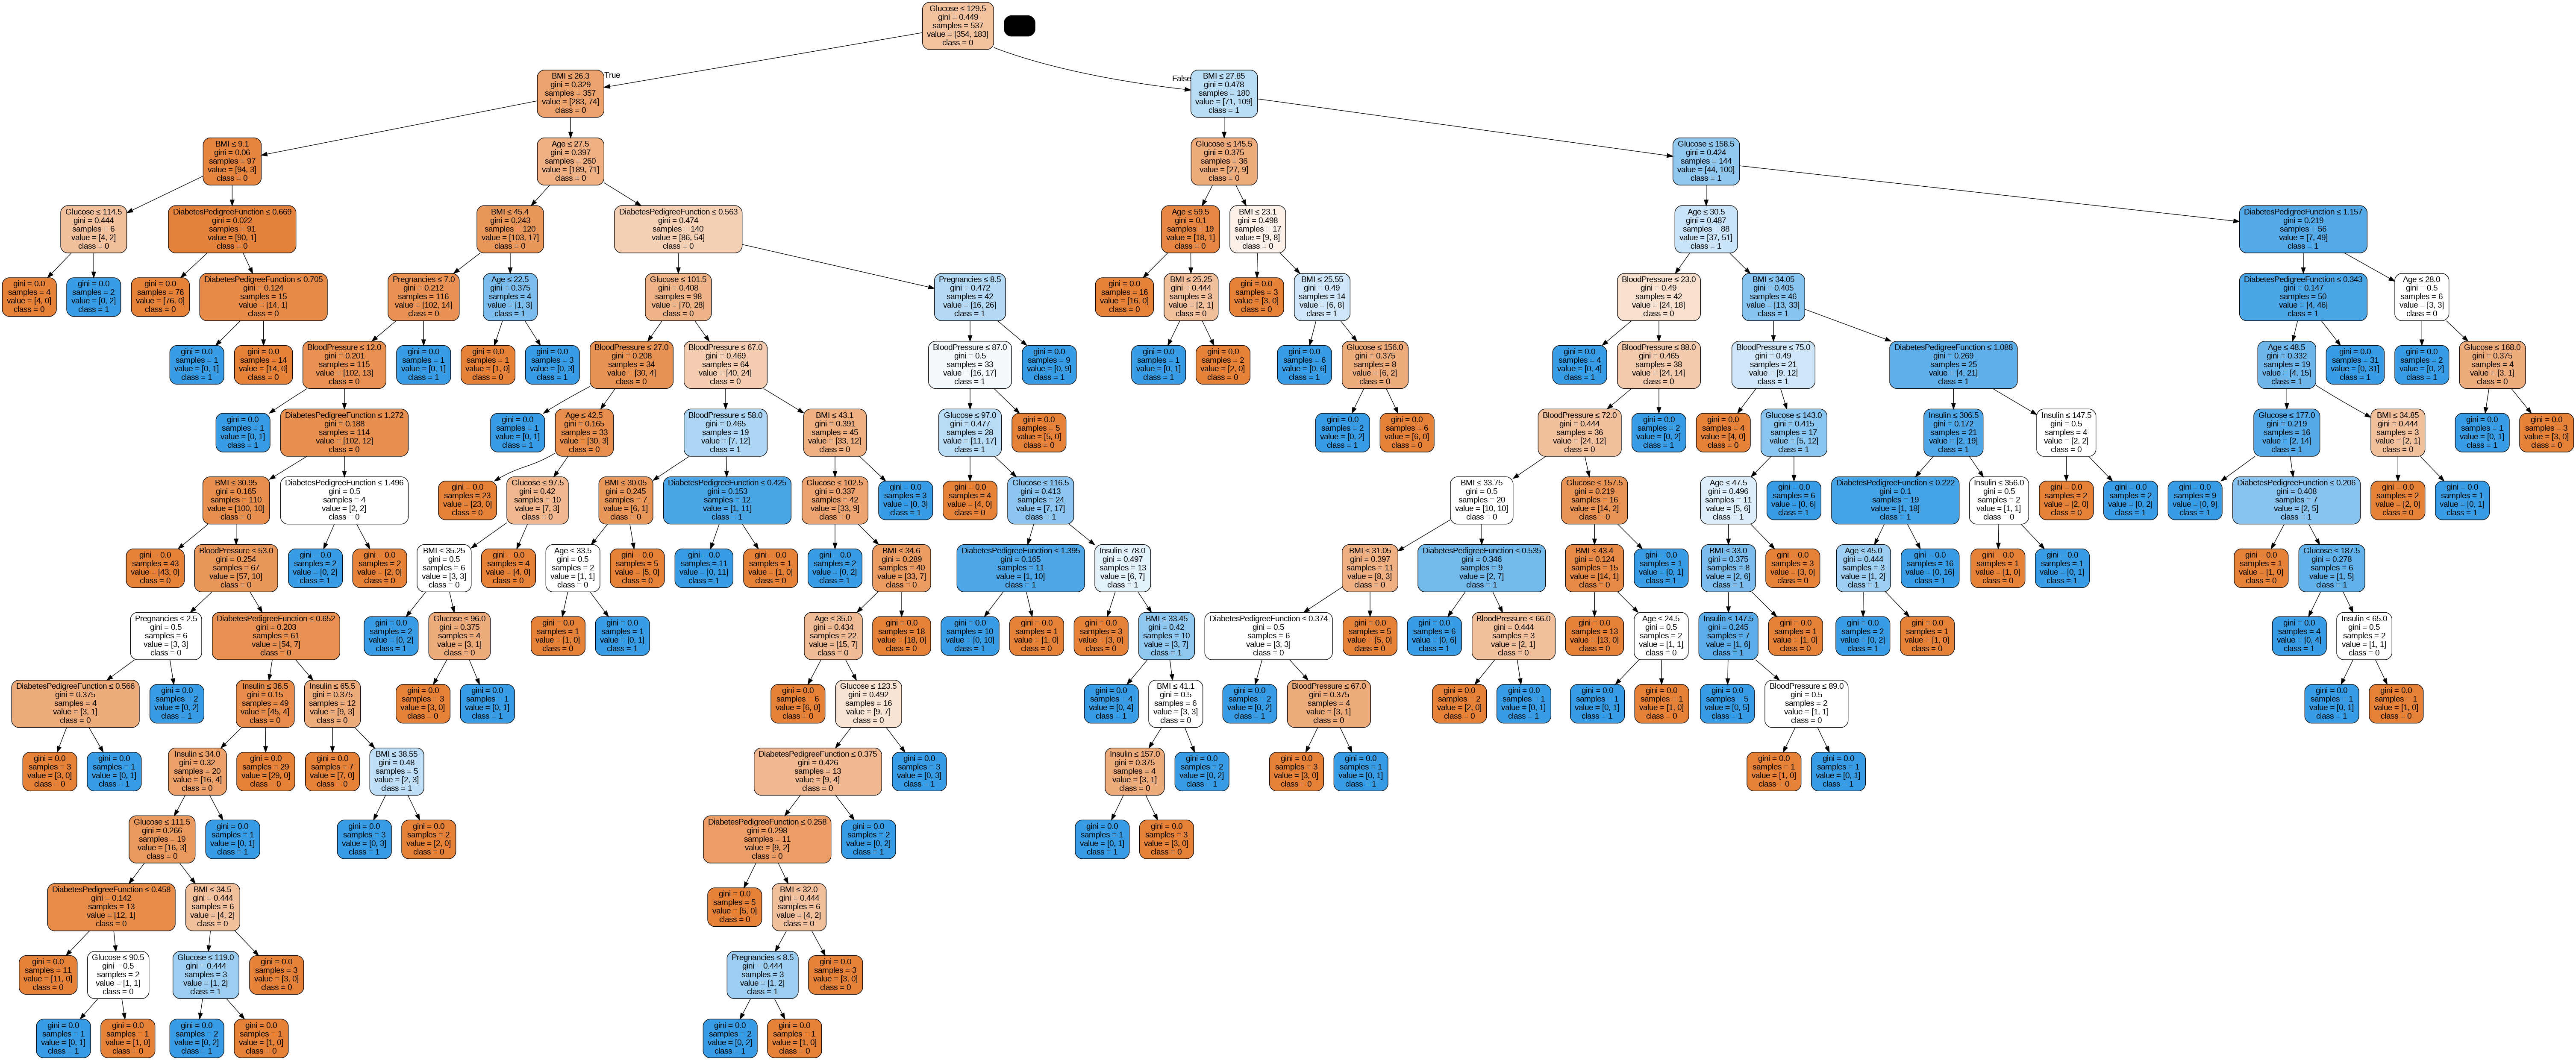

In [ ]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())